In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define a list of months as strings
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
          'November', 'December']

# Define an empty list to store dataframes
dfs = []

# Loop through the list of months 
for month in months:
    # Check if the month is November (case insensitive)
    if month.lower()=="november":
        # If it is November, construct the filename
        filename = f"Sales_{month}_2019.csv"
        # Read the CSV file into a Pandas dataframe
        file = pd.read_csv(filename)
        # Rename a specific column in the dataframe
        file=file.rename(columns={'Unnamed: 5':'Purchase Address'})
        # Append the dataframe to the list
        dfs.append(file)
    
    else:
        # If it is not November, construct the filename
        filename = f"Sales_{month}_2019.csv"
        # Read the CSV file into a Pandas dataframe
        file = pd.read_csv(filename)
        # Append the dataframe to the list
        dfs.append(file)

# Concatenate all the dataframes in the list into a single dataframe
merged_df = pd.concat(dfs, axis="rows")
# Assign the merged dataframe to the 'dfs' variable
dfs=merged_df
# Print the resulting dataframe
dfs


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001"


In [3]:
dfs.describe()

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [4]:
dfs.describe(include='O')

,Product,Order Date,Purchase Address
count,185950,185950,185950
unique,19,142395,140787
top,USB-C Charging Cable,12/15/2019 20:16,"193 Forest St, San Francisco, CA 94016"
freq,21903,8,9


### Fill missing values in "Purchase Address" column with the mode

In [5]:
dfs["Purchase Address"].fillna(dfs["Purchase Address"].value_counts().idxmax(),inplace=True)

In [6]:
dfs["Purchase Address"].isnull().sum()

0

### Fill missing values in "Order ID" column with the mean

In [7]:
dfs["Order ID"].isnull().sum()

900

In [8]:
missing_value_data=dfs["Order ID"].mean()

In [9]:
dfs["Order ID"].fillna(missing_value_data,inplace=True)

In [10]:
dfs["Order ID"].isnull().sum()

0

In [11]:
dfs.isnull().sum()

Order ID              0
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address      0
dtype: int64

### Fill missing values in "Product" column with the mode

In [12]:
missing_values_prod=dfs["Product"].mode()[0]
dfs["Product"].fillna(missing_values_prod,inplace=True)

# Check for missing values in "Product" column
dfs['Product'].isnull().sum()

0

### Fill missing values in "Quantity Ordered" column with the mean

In [13]:
dfs["Quantity Ordered"].fillna(dfs["Quantity Ordered"].mean(),inplace=True)

# Check for missing values in "Quantity Ordered" column
dfs["Quantity Ordered"].isnull().sum()

0

### Fill missing values in "Price Each" column with the median

In [14]:
dfs["Price Each"].fillna(dfs["Price Each"].median(),inplace=True)

# Check for missing values in "Price Each" column
dfs["Price Each"].isnull().sum()

0

### Fill missing values in "Order Date" column with the mode

In [15]:
dfs["Order Date"].fillna(dfs["Order Date"].value_counts().idxmax(),inplace=True)

# Check for missing values in "Order Date" column
dfs["Order Date"].isnull().sum()

0

In [16]:
# Checking the datatype of each column of the dataframe
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186850 non-null  float64
 1   Product           186850 non-null  object 
 2   Quantity Ordered  186850 non-null  float64
 3   Price Each        186850 non-null  float64
 4   Order Date        186850 non-null  object 
 5   Purchase Address  186850 non-null  object 
dtypes: float64(3), object(3)
memory usage: 10.0+ MB


### Creating a new column named Month

In [17]:
dfs['Order Date'].isnull().sum()

0

### Convert "Month" column to integer

In [18]:
dfs['Month']=pd.to_datetime(dfs['Order Date']).dt.month

In [19]:
dfs['Month']=dfs['Month'].astype(int)

### Extract "City" from "Purchase Address"


In [20]:
dfs['City']=dfs['Purchase Address'].apply(lambda x:x.split(",")[1])
dfs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",12,Seattle
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",12,Dallas


### Create a list of columns to perform statistical analysis on

In [21]:
# Create a list of columns to perform statistical analysis on
columns = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Month', 'City']

# Set the index to perform statistical analysis on
index = 6

# Calculate the sum, mean, standard deviation, skewness, and kurtosis for the selected column
sum=dfs[columns[index]].sum()
mean=dfs[columns[index]].mean()
std=dfs[columns[index]].std()
skewness=dfs[columns[index]].skew()
kurtosis=dfs[columns[index]].kurtosis()

# Print the results
print(f"Summary of {columns[index]} column:")
print(f"The total sum is {sum}")
print(f"The average/mean is {mean}")
print(f"The standard deviation is {std}")
print(f"The skewness is {skewness}")
print(f"The kurtosis is {kurtosis}")

Summary of Month column:
The total sum is 1323447
The average/mean is 7.0829381857104625
The standard deviation is 3.5112526293612305
The skewness is -0.09445379247366956
The kurtosis is -1.29652148965562


### Calculating the correlation

In [22]:
# Calculate the correlation matrix
dfs.corr()

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002855,0.988339
Quantity Ordered,0.000702,1.000000,-0.148180,0.000787
Price Each,-0.002855,-0.148180,1.000000,-0.006798
Month,0.988339,0.000787,-0.006798,1.000000


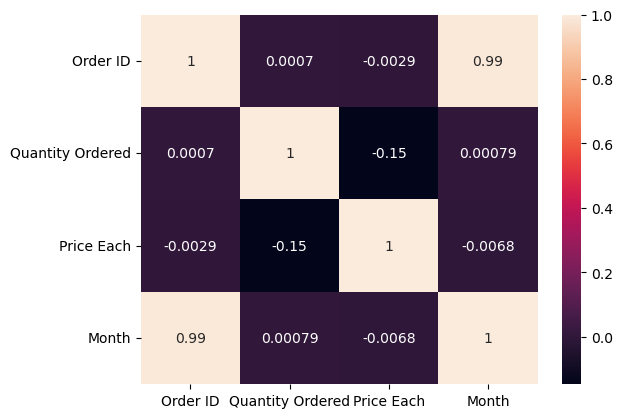

In [23]:
# Displaying the correlation in figure 
sns.heatmap(dfs.corr(),annot=True);

### The heatmap shows the correlation among the features. The value ranges from -1 to 1 where -1 represents that the features are perfectly negatively correlated, 1 indicates that the they perfectly positively correlated whereas 0 represents there is no correlation.

In [24]:
dfs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",12,Seattle
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",12,Dallas


### Data Exploration

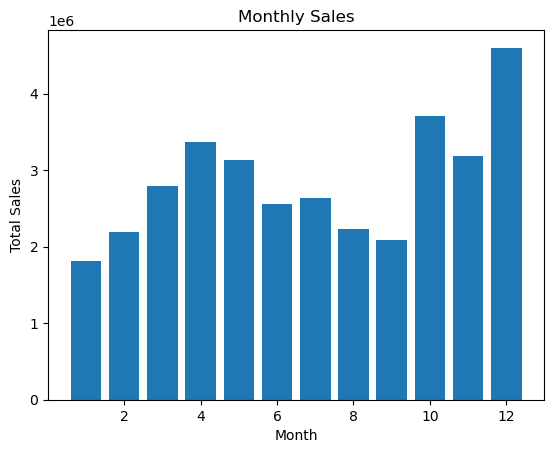

In [25]:
# Group the data by month and calculate the total sales
monthly_sales = dfs.groupby('Month')['Price Each'].sum().sort_values(ascending=False)


# Create a bar chart showing monthly sales
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [26]:
# Identify the best month for sales
best_month = monthly_sales.idxmax()
best_sales = monthly_sales[best_month]

print(f"The best month was {best_month}") 
print(f"The max sale in {best_month} was {best_sales}")

The best month was 12
The max sale in 12 was 4601870.41


In [27]:
# Calculate the total quantity sold for each product
dfs['Total Sales'] = dfs['Quantity Ordered'] * dfs['Price Each']

city_sales = dfs.groupby('City')['Total Sales'].sum()
city_sales = city_sales.sort_values(ascending=False)
city_sales
print('The city with the highest total sales is', city_sales.index[0])

The city with the highest total sales is  San Francisco


In [28]:
dfs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
0,141234.0,iPhone,1.0,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",1,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",1,Austin,11.99
...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco,14.95
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,7.68
25114,319668.0,Vareebadd Phone,1.0,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101",12,Seattle,400.00
25115,319669.0,Wired Headphones,1.0,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001",12,Dallas,11.99


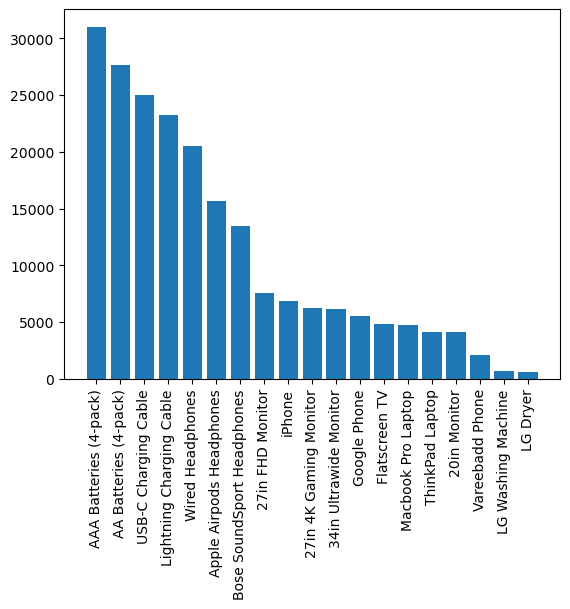

In [29]:
# Create a bar chart showing the most popular products
max_sold=dfs.groupby('Product')['Quantity Ordered'].sum()
max_sold=max_sold.sort_values(ascending=False)
plt.bar(max_sold.index,max_sold.values);
plt.xticks(rotation=90)
plt.show()

In [30]:
quantity_sold = max_sold.loc["AAA Batteries (4-pack)"]
print("The quantity sold for AAA batteries 4 pack is:", quantity_sold)

The quantity sold for AAA batteries 4 pack is: 31017.0


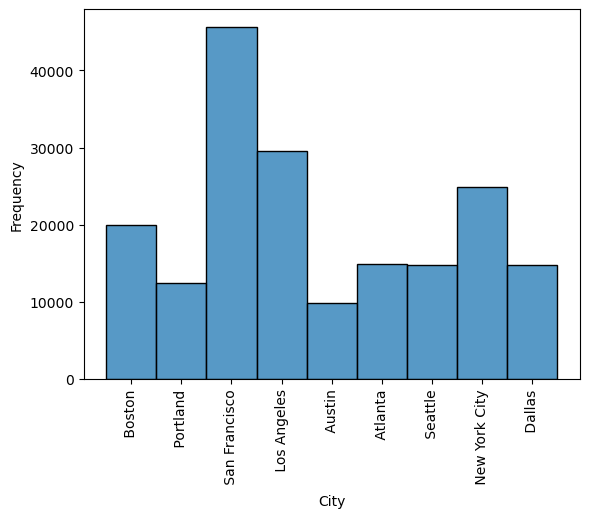

In [31]:
# Create a histogram showing the frequency distribution of the "City" column
column="City"
sns.histplot(dfs[column])
plt.xlabel(column)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()